In [31]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from scipy import stats
from pathlib import Path
import pynapple as nap

from spatial_manifolds.data.binning import get_bin_config
from spatial_manifolds.data.loading import load_session

import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
mouse = 0
day = 0
session_type = 'OF1'
sorter = 'kilosort4'
storage = Path('/Users/harryclark/Downloads/COHORT12_nolfp/')

alpha = 0.001
n_jobs = 8
n_shuffles = 100
seed = 1

class Args:
    def __init__(self,mouse,day,session_type,sorter,storage,alpha,n_jobs,n_shuffles,seed):
        self.mouse = mouse
        self.day = day
        self.session_type = session_type
        self.sorter = sorter
        self.storage = storage
        self.alpha = alpha
        self.n_jobs = n_jobs
        self.n_shuffles = n_shuffles
        self.seed = seed
args = Args(mouse,day,session_type,sorter,storage,alpha,n_jobs,n_shuffles,seed)

if session_type == 'VR':
    tl = 200
elif session_type == 'MCVR':
    tl = 230


In [33]:
get_bin_config(args.session_type)

{('P_x', 'P_y'): {'dim': '2d',
  'bounds': (0.0, 100.0, 0.0, 100.0),
  'num_bins': 40,
  'smooth_sigma': 1.5},
 'S': {'dim': '1d', 'bounds': (3.0, 45.0), 'num_bins': 15},
 'T': {'dim': '1dc',
  'bounds': (-3.141592653589793, 3.141592653589793),
  'num_bins': 10},
 'H': {'dim': '1dc',
  'bounds': (-3.141592653589793, 3.141592653589793),
  'num_bins': 20}}

In [34]:
# Load session
sessions = {}
for session_path in sorted(
    list(args.storage.glob(f'*/*/{args.session_type}/*{args.session_type}.nwb'))
):  
    print(session_path)
    args.mouse = int(session_path.parent.parent.parent.name[1:])
    args.day = int(session_path.parent.parent.name[1:])
    mouse_day = f'M{args.mouse}D{args.day}'
    sessions[mouse_day] = (
        *load_session(args),
        pd.read_parquet(
            session_path.parent / 'tuning_scores' / 'grid_score.parquet'
        ),
        pd.read_parquet(
            session_path.parent / 'tuning_scores' / 'ellipse_grid_score.parquet'
        ),
        pd.read_parquet(
            session_path.parent / 'tuning_scores' / 'theta_index.parquet'
        ),
        pd.read_parquet(
            session_path.parent / 'tuning_scores' / 'spatial_information.parquet'
        ),
    )

/Users/harryclark/Downloads/COHORT12_nolfp/M20/D14/OF1/M20D14OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D15/OF1/M20D15OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D16/OF1/M20D16OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D17/OF1/M20D17OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D18/OF1/M20D18OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D19/OF1/M20D19OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D20/OF1/M20D20OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D21/OF1/M20D21OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D22/OF1/M20D22OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D23/OF1/M20D23OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D24/OF1/M20D24OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D25/OF1/M20D25OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D26/OF1/M20D26OF1.nwb
/Users/harryclark/Downloads/COHORT12_nolfp/M20/D27/OF1/M20D27OF1.nwb
/Users/harryclark/Downloads/COHORT

In [ ]:
ellipse_grid_scores = []
grid_scores = []
theta_indexes = []
spatial_information_scores = []

full_table = pd.DataFrame()

grid_cells = 0; theta_cells = 0; spatial_cells = 0; egrid_cells= 0; total_cells=0
for day_idx, (
    day,
    (session, session_path, clusters, grid_table, e_grid_table, theta_table, spatial_table),
) in enumerate(sessions.items()):
    score_table = pd.merge()
    full_table = 

    grid_scores.append(grid_table['grid_score'].values)
    ellipse_grid_scores.append(e_grid_table['grid_score'].values)
    theta_indexes.append(theta_table['theta_index'].values) 
    spatial_information_scores.append(spatial_table['spatial_information'].values)
    grid_cells+=np.sum(grid_table['sig']==True)
    egrid_cells+=np.sum(e_grid_table['sig']==True)
    theta_cells+=np.sum(theta_table['sig']==True)
    spatial_cells+=np.sum(spatial_table['sig']==True)
    total_cells+=len(spatial_table)
print(f'{grid_cells} grid_cells')
print(f'{egrid_cells} egrid_cells')
print(f'{theta_cells} theta_cells')
print(f'{spatial_cells} spatial_cells')
print(f'{total_cells} total cells')
print(f'{len(sessions)} total sessions')

383 grid_cells
371 egrid_cells
1692 theta_cells
8452 spatial_cells
13861 total cells
85 total sessions


Index    rate     num_spikes    firing_rate         presence_ratio    snr                 isi_violations_ratio    isi_violations_count    ...
-------  -------  ------------  ------------------  ----------------  ------------------  ----------------------  ----------------------  -----
2        0.79088  9732          2.1615330146515825  1.0               3.2063391127542227  0.2852247951639068      18                      ...
10       0.84132  9411          2.0902370736627662  1.0               2.504748269483664   0.2372331968049335      14                      ...
11       0.49489  28619         6.356444034763013   1.0               3.824846429349779   0.0659648476578994      36                      ...
16       9.43298  21234         4.716193180549908   1.0               3.7793902239225994  0.089870904044953       27                      ...
18       1.577    21393         4.751507992441565   1.0               2.58948833573775    0.2065932555600844      63                      ...
19  

In [53]:
grid_table

,cluster_id,grid_score,null_distribution,type,sig
0,2,-0.206682,"[-0.17679631413640104, nan, nan, -0.2460700449...",grid_score,False
1,10,NaN,"[nan, -0.045821312930809675, -0.02681598672637...",grid_score,False
2,11,-0.136985,"[-0.1301796113351325, -0.33556905260207637, -0...",grid_score,False
3,16,-0.078053,"[0.05160164709640355, 0.10580529262268437, -0....",grid_score,False
4,18,NaN,"[0.45762596597479266, 0.03033378229710853, -0....",grid_score,False
...,...,...,...,...,...
266,550,-0.180905,"[nan, -0.04138019844483376, -0.153753903198992...",grid_score,False
267,552,NaN,"[nan, -0.22624146619012747, -0.230021660779511...",grid_score,False
268,553,-0.028267,"[-0.38631363572050426, 0.010739914961749183, 0...",grid_score,False
269,554,-0.310478,"[nan, 0.06357685210635847, nan, -0.47895806066...",grid_score,False


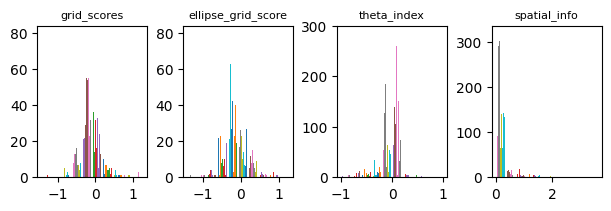

In [36]:
fig, axs = plt.subplots(1, 4, layout='constrained', figsize=(6, 2))
axs[0].hist(grid_scores)
axs[1].hist(ellipse_grid_scores)
axs[2].hist(theta_indexes)
axs[3].hist(spatial_information_scores)
axs[0].set_title('grid_scores',fontsize=8)
axs[1].set_title('ellipse_grid_score',fontsize=8)
axs[2].set_title('theta_index',fontsize=8)
axs[3].set_title('spatial_info',fontsize=8)
plt.show()
